# Building dataframe


Import needed library for learning model

In [363]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

Build dataframe for training set

In [364]:
dataframe = pd.read_csv('C:\\Users\\LamPhuss\\Code\\Python\\ML_Projects-main\\ML_Projects-main\\src\\divde\\output_files_0.csv')
dataframe.head()

,make,variant,car_price,car_badges,car_seller,year,body_type,miles,engine_size,transmission,feul_type,num_owner
0,AC,NaN,89995,NaN,Private seller,2001,convertible,14400.0,225.0,manual,petrol,5.0
1,AC,NaN,92500,'',Boss Motor Company Limited,2019,convertible,650.0,NaN,manual,petrol,NaN
2,AC,NaN,109995,'',PREMIER GT LIMITED,2000,convertible,21600.0,NaN,manual,petrol,3.0
3,AC,NaN,124950,'',TOP 555 LIMITED,1989,convertible,2750.0,NaN,manual,petrol,NaN
4,AC,NaN,124950,'',TOP 555 LIMITED,1989,convertible,15142.0,NaN,manual,petrol,NaN


# Data Analysis and Preprocessing

## Check collumns and shapes in dataframe

In [365]:
dataframe.columns

Index(['make', 'variant', 'car_price', 'car_badges', 'car_seller', 'year',
       'body_type', 'miles', 'engine_size', 'transmission', 'feul_type',
       'num_owner'],
      dtype='object')

we can drop first column since it does not affect the price.

In [366]:
print("There are " + str(dataframe.shape[0]) + " rows and " + str(dataframe.shape[1]) + " columns")

There are 409228 rows and 12 columns


## Describe some basic statistical values

In [367]:
dataframe.describe()

,car_price,miles,engine_size,num_owner
count,4.092280e+05,378854.000000,407593.000000,220999.000000
mean,2.174495e+04,49067.253850,182.815122,2.128032
std,2.465361e+04,37370.753695,99.492038,1.302906
min,3.000000e+02,2.000000,1.000000,1.000000
25%,9.293750e+03,18824.000000,120.000000,1.000000
50%,1.600000e+04,40000.000000,150.000000,2.000000
75%,2.649500e+04,72726.250000,200.000000,3.000000
max,3.199830e+06,999999.000000,986.000000,18.000000


## Describe summary of data frame 

In [368]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409228 entries, 0 to 409227
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   make          409228 non-null  object 
 1   variant       408199 non-null  object 
 2   car_price     409228 non-null  int64  
 3   car_badges    399695 non-null  object 
 4   car_seller    409179 non-null  object 
 5   year          409228 non-null  object 
 6   body_type     408908 non-null  object 
 7   miles         378854 non-null  float64
 8   engine_size   407593 non-null  float64
 9   transmission  409132 non-null  object 
 10  feul_type     409139 non-null  object 
 11  num_owner     220999 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 37.5+ MB


## Handling outliers

In [369]:
train_outliers=dataframe.select_dtypes(include=['int', 'float'])
train_outliers.head()


,car_price,miles,engine_size,num_owner
0,89995,14400.0,225.0,5.0
1,92500,650.0,NaN,NaN
2,109995,21600.0,NaN,3.0
3,124950,2750.0,NaN,NaN
4,124950,15142.0,NaN,NaN


In [370]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    outliers = train_outliers[(train_outliers[col] < range_low) | (train_outliers[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))
    

NUmber of outliers in car_price is : 26816
NUmber of outliers in miles is : 4136
NUmber of outliers in engine_size is : 33047
NUmber of outliers in num_owner is : 2213


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart

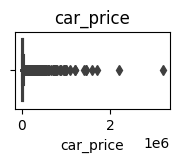

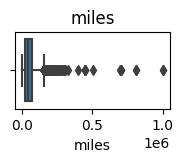

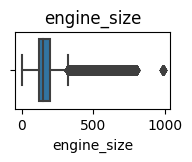

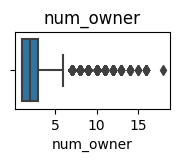

In [371]:

for col in train_outliers:
    plt.figure(figsize=(2,1))
    sns.boxplot(x=train_outliers[col], whis=1.5)
    plt.title(col)
    plt.show()

Replace all outliers

In [372]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    train_outliers = train_outliers[(train_outliers[col] >= range_low) & (train_outliers[col] <= range_high)]

    outliers = train_outliers[(train_outliers[col] < range_low) | (train_outliers[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))

NUmber of outliers in car_price is : 0
NUmber of outliers in miles is : 0
NUmber of outliers in engine_size is : 0
NUmber of outliers in num_owner is : 0


## Checking Data Imbalance *

In [373]:
train_data_imbalance=dataframe.select_dtypes(include=['object'])
train_data_imbalance.head()


,make,variant,car_badges,car_seller,year,body_type,transmission,feul_type
0,AC,NaN,NaN,Private seller,2001,convertible,manual,petrol
1,AC,NaN,'',Boss Motor Company Limited,2019,convertible,manual,petrol
2,AC,NaN,'',PREMIER GT LIMITED,2000,convertible,manual,petrol
3,AC,NaN,'',TOP 555 LIMITED,1989,convertible,manual,petrol
4,AC,NaN,'',TOP 555 LIMITED,1989,convertible,manual,petrol


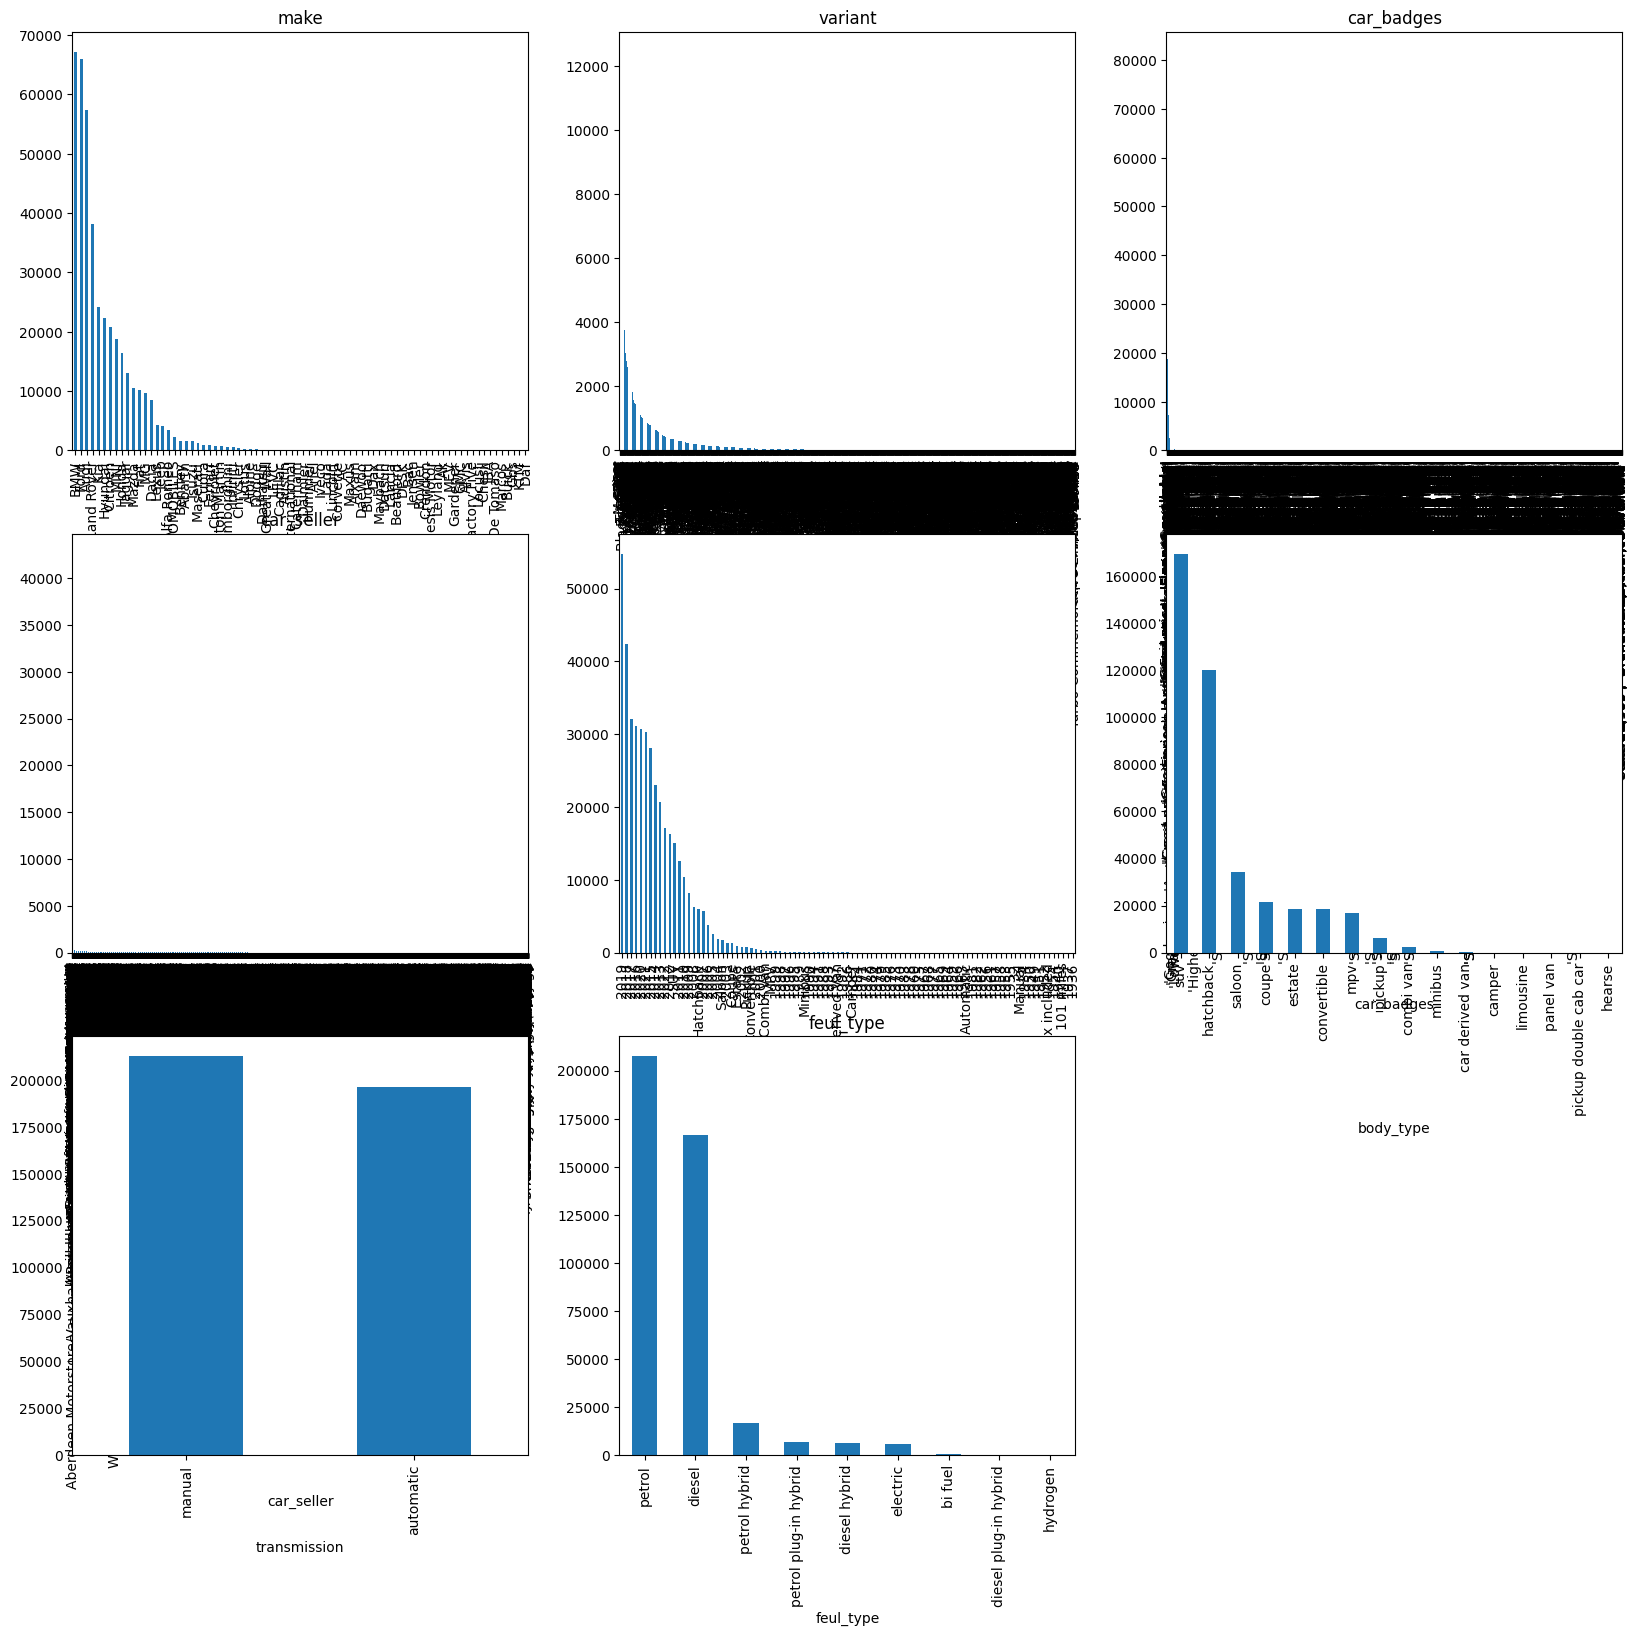

In [374]:
k=0
plt.figure(figsize=(20,25))
for col in train_data_imbalance:    
    k=k+1
    plt.subplot(4, 3,k)    
    train_data_imbalance[col].value_counts().plot(kind='bar')
    plt.title(col)

## Handle missing value

In [346]:
dataframe.columns[dataframe.isna().any()].tolist()

['variant',
 'car_badges',
 'car_seller',
 'body_type',
 'miles',
 'engine_size',
 'transmission',
 'feul_type',
 'num_owner']

In [347]:
train_missings = dataframe.filter(
['variant', 'car_seller', 'miles', 'transmission', 'feul_type', 'num_owner'] ,axis=1)

In [348]:
print("Missing-value rate of train data:")
mis_val_train = train_missings.isnull().sum() / len(train_missings) * 100
print(mis_val_train)

Missing-value rate of train data:
variant          0.251449
car_seller       0.011974
miles            7.422268
transmission     0.023459
feul_type        0.021748
num_owner       45.996120
dtype: float64


We will drop all records that contain missing values

In [350]:
dataframe.dropna(inplace= True)

Checking missing data again

In [351]:
print("Number of columns that have NaN values are : " + str(len(dataframe.columns[dataframe.isna().any()].tolist())))

Number of columns that have NaN values are : 0



All NaN values have been handled ,so we have done this step

# Encoding labels

In [352]:

encoding_col = dataframe.select_dtypes(include='object')
encoding_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 211421 entries, 8 to 409225
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   make          211421 non-null  object
 1   variant       211421 non-null  object
 2   car_badges    211421 non-null  object
 3   car_seller    211421 non-null  object
 4   year          211421 non-null  object
 5   body_type     211421 non-null  object
 6   transmission  211421 non-null  object
 7   feul_type     211421 non-null  object
dtypes: object(8)
memory usage: 14.5+ MB


In [355]:
encoding_col = dataframe.select_dtypes(include='object')
le = LabelEncoder()
for col in encoding_col:
    le.fit(encoding_col[col])
    dataframe[col] = le.transform(encoding_col[col])
dataframe.info()



<class 'pandas.core.frame.DataFrame'>
Index: 211421 entries, 8 to 409225
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   make          211421 non-null  int32  
 1   variant       211421 non-null  int32  
 2   car_price     211421 non-null  int64  
 3   car_badges    211421 non-null  int32  
 4   car_seller    211421 non-null  int32  
 5   year          211421 non-null  int32  
 6   body_type     211421 non-null  int32  
 7   miles         211421 non-null  float64
 8   engine_size   211421 non-null  float64
 9   transmission  211421 non-null  int32  
 10  feul_type     211421 non-null  int32  
 11  num_owner     211421 non-null  float64
dtypes: float64(3), int32(8), int64(1)
memory usage: 14.5 MB


# Splitting data into train and test

In [356]:
y = dataframe['car_price']
X = dataframe.drop(columns=['car_price'],axis=1)

y.head()

8     24275
9     24275
10    25000
12    15995
13    16195
Name: car_price, dtype: int64

In [357]:
# 60% train ,20$ validation ,20% test 
X_train, X_test, y_train, y_test = train_test_split(X ,y , train_size=0.7, random_state=100 )
X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_or, y_train_or, test_size=0.25)
print(X_val.shape)
print(y_val.shape)


(42284, 11)
(42284,)


In [358]:
X_train.columns

Index(['make', 'variant', 'car_badges', 'car_seller', 'year', 'body_type',
       'miles', 'engine_size', 'transmission', 'feul_type', 'num_owner'],
      dtype='object')

# Training the model

Bulding function needed to get metrics for val set

In [359]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {model.score(X_val, y_val)}')

## Random forest

In [360]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
get_metrics(rf)

Train score 0.994777672753862
Val score 0.9730880141589751
